# Train Data

Train a neural network on the images imported in the previous step.

In [1]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import scipy
import numpy as np

In [2]:
# Same network definition as before
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = tflearn.DNN(network, tensorboard_verbose=0)
model.load("image-classifier.tfl")

In [7]:
import os
import glob
from PIL import Image

image_list = list()
classification_list = list()

taxonomies = glob.glob("Images/*")
for taxonomy in taxonomies:        
    for image in glob.glob(os.path.join(taxonomy,"*.jpg")):
        image_ = Image.open(image)
        break
    

In [40]:
%pylab --no-import-all
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


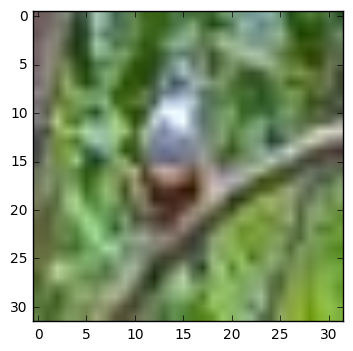

In [41]:
plt.imshow(image_) 